Image shape: (64, 64)


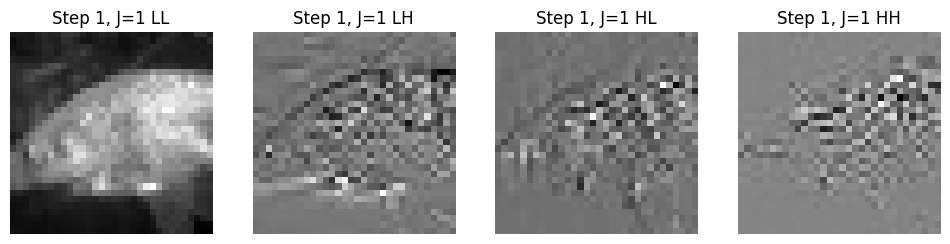

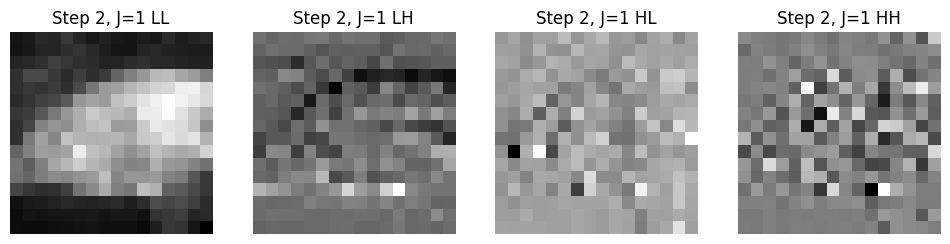

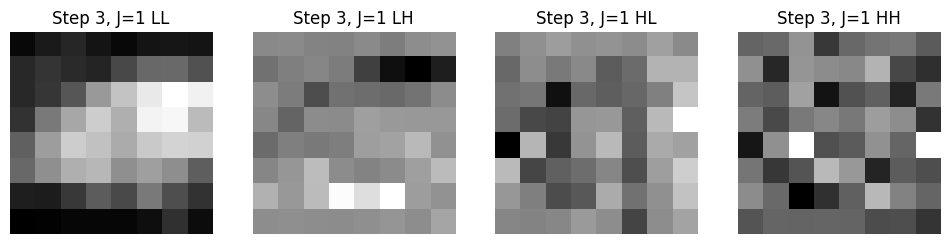

In [13]:
import cv2
import pywt
import matplotlib.pyplot as plt

def plot_subbands(coeffs, title_prefix=""):
    """Plot LL, LH, HL, HH subbands."""
    LL, (LH, HL, HH) = coeffs
    
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    for ax, data, name in zip(
        axes,
        [LL, LH, HL, HH],
        ["LL", "LH", "HL", "HH"]
    ):
        ax.imshow(data, cmap="gray")
        ax.set_title(f"{title_prefix} {name}")
        ax.axis("off")
    plt.show()


def multi_wavelet_decomposition(image, wavelet="haar", J=[1,2,3]):
    """Perform wavelet decomposition multiple times with configurable J per step."""
    current_img = image
    for i, level in enumerate(J, 1):
        coeffs = pywt.wavedec2(current_img, wavelet=wavelet, level=level)
        coeffs_first_level = (coeffs[0], coeffs[1])
        
        plot_subbands(coeffs_first_level, title_prefix=f"Step {i}, J={level}")
        
        # Update current image to LL for next iteration
        current_img = coeffs[0]


if __name__ == "__main__":
    # Load grayscale image
    img = cv2.imread(r"D:\DDP_amit_sethi\workspace-VAE\images\n01443537_2.JPEG", cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise FileNotFoundError("Image not found! Check the path to your_image.jpg.")
    
    # Ensure it's 2D (sometimes OpenCV can add extra dims)
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    print("Image shape:", img.shape)
    
    # Perform decomposition
    J = [1, 1, 1]  # configurable
    multi_wavelet_decomposition(img, wavelet="haar", J=J)
